In [16]:
# 1. Environment & Imports (with path setup)
import os, time, json, sys
from pathlib import Path

# Determine project root (parent of notebooks directory)
ROOT = Path.cwd().parent  # notebooks -> upreg_classify
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))  # ensure 'src' package import works

# Diagnostic: interpreter path
print('sys.executable:', sys.executable)
# Optional: verify path injection
print('Added to sys.path:', str(ROOT) in sys.path)
print('sys.path[0]:', sys.path[0])

from autogluon.tabular import TabularPredictor
# Import project training entry
from src.train.train import train_and_evaluate

DATA_RAW = ROOT / 'data' / 'raw'
MODELS_DIR = ROOT / 'models'
print('ROOT:', ROOT)
print('Data raw exists:', DATA_RAW.exists())
print('Models dir:', MODELS_DIR)

sys.executable: c:\PythonProjects\rl_reserve_markets\.venv1\Scripts\python.exe
Added to sys.path: True
sys.path[0]: C:\Users\haako\AppData\Local\Programs\Python\Python312\python312.zip
ROOT: c:\PythonProjects\rl_reserve_markets\upreg_classify
Data raw exists: True
Models dir: c:\PythonProjects\rl_reserve_markets\upreg_classify\models


In [17]:
# 2. Utility wrapper
import importlib

def reload_all():
    """Reload key project modules to pick up file changes without restarting VS Code."""
    print('--- Reloading project modules ---')
    import src.data.preprocess as dp
    import src.data.features as feat
    import src.train.hyperparameters as hp
    import src.train.train as tr
    importlib.reload(dp)
    importlib.reload(feat)
    importlib.reload(hp)
    importlib.reload(tr)
    # Re-export key symbols to current namespace if needed
    from src.train.train import train_and_evaluate as _tae
    globals()['train_and_evaluate'] = _tae
    print('Reloaded: preprocess, features, hyperparameters, train')


def run_training(description: str, **kwargs):
    """Run training via train_and_evaluate and report duration + key metrics.
    Required kwargs mirror train_and_evaluate parameters.
    """
    print(f'=== Run: {description} ===')
    start = time.time()
    metrics = train_and_evaluate(**kwargs)
    dur = time.time() - start
    print(f'Completed in {dur:.1f}s')
    print(json.dumps(metrics, indent=2))
    return metrics


def base_common(area='NO1'):
    return dict(
        task='multiclass',
        area=area,
        data_dir=str(DATA_RAW),
        include_2024=True,
        heavy_interactions=False,
        dropna=True,
        train_frac=0.6, val_frac=0.2, test_frac=0.2,
        activation_lag_start=4,
        single_persistence=True,
        weight_factor_up=1.0, weight_factor_down=1.0, weight_factor_none=1.0,
        tune_up_bias=True, tune_up_objective='macro',
        num_bag_folds=0, num_stack_levels=0,
        importance_time_limit=60, importance_subsample=1200, importance_top_n=40,
        use_categorical_reglag=False,
        data_start=None,
    )

In [18]:
# 3. Quick RF/XT priority baseline (NO1)
baseline_cfg = base_common(area='NO1')
baseline_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'baseline_rf_xt_priority'),
    time_limit=120,
    presets='best_quality',
    model_preset='rf_xt_priority',
    hpo_trials=0, hpo_searcher='random', hpo_scheduler='local',
))
# Uncomment to run
# run_training('Baseline RF/XT Priority NO1', **baseline_cfg)

=== Run: CatBoost-only HPO(4) NO1 ===
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 65)
Dataset splits: train=38007, val=12669, test=12669 (total=63345)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 65)
Dataset splits: train=38007, val=12669, test=12669 (total=63345)


Verbosity: 2 (Standard Logging)
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.80 GB / 13.85 GB (27.4%)
Disk Space Avail:   402.71 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.80 GB / 13.85 GB (27.4%)
Disk Space Avail:   402.71 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 240s
AutoGluon

  0%|          | 0/4 [00:00<?, ?it/s]

Fitted model: CatBoost\T1 ...
	0.6213	 = Validation score   (f1_macro)
	10.44s	 = Training   runtime
	0.01s	 = Validation runtime
	0.6213	 = Validation score   (f1_macro)
	10.44s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost\T2 ...
	0.6213	 = Validation score   (f1_macro)
	6.8s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost\T3 ...
Fitted model: CatBoost\T2 ...
	0.6213	 = Validation score   (f1_macro)
	6.8s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost\T3 ...
	0.6191	 = Validation score   (f1_macro)
	11.05s	 = Training   runtime
	0.01s	 = Validation runtime
	0.6191	 = Validation score   (f1_macro)
	11.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost\T4 ...
	0.6145	 = Validation score   (f1_macro)
	14.21s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: CatBoost\T4 ...
	0.6145	 = Validation score   (f1_macro)
	14.21s	 = Training   runtime
	0.01s	 = Validation ru

Tuning up-multiplier alpha=0.75: F1(up)=0.3587, F1(macro)=0.6037
Tuning up-multiplier alpha=0.90: F1(up)=0.4099, F1(macro)=0.6208
Tuning up-multiplier alpha=1.00: F1(up)=0.4240, F1(macro)=0.6252
Tuning up-multiplier alpha=1.10: F1(up)=0.4236, F1(macro)=0.6247
Tuning up-multiplier alpha=1.18: F1(up)=0.4212, F1(macro)=0.6238
Tuning up-multiplier alpha=1.25: F1(up)=0.4205, F1(macro)=0.6234
Tuning up-multiplier alpha=1.30: F1(up)=0.4212, F1(macro)=0.6236
Tuning up-multiplier alpha=1.38: F1(up)=0.4218, F1(macro)=0.6237
Tuning up-multiplier alpha=1.45: F1(up)=0.4225, F1(macro)=0.6238
Tuning up-multiplier alpha=1.50: F1(up)=0.4226, F1(macro)=0.6238
Tuning up-multiplier alpha=1.75: F1(up)=0.4305, F1(macro)=0.6264
Tuning up-multiplier alpha=2.00: F1(up)=0.4293, F1(macro)=0.6261
Tuning up-multiplier alpha=1.30: F1(up)=0.4212, F1(macro)=0.6236
Tuning up-multiplier alpha=1.38: F1(up)=0.4218, F1(macro)=0.6237
Tuning up-multiplier alpha=1.45: F1(up)=0.4225, F1(macro)=0.6238
Tuning up-multiplier alph

These features in provided data are not utilized by the predictor and will be ignored: ['NO1-NO2_ratio_dup1', 'NO1-NO3_ratio_dup1', 'NO1-NO5_ratio_dup1', 'NO1-SE3_ratio_dup1']
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
	21.19s	= Expected runtime (2.12s per shuffle set)
	21.19s	= Expected runtime (2.12s per shuffle set)
	3.87s	= Actual runtime (Completed 10 of 10 shuffle sets)
	3.87s	= Actual runtime (Completed 10 of 10 shuffle sets)


Top feature importances:
  Persistency: 0.274189
  PriceUp - DA: 0.022475
  Up-Down Price Skew: 0.019422
  PriceUp/DA Ratio: 0.015405
  PriceDown - DA: 0.005193
  NO1-SE3_ratio: 0.003193
  PriceDown/DA Ratio: 0.002786
  HOD: 0.002287
  RegLag-6: 0.002137
  NO1-NO5_ratio: 0.002050
  RegLag-12: 0.001744
  DA Price: 0.001668
  aFRR_ActCat-8: 0.001663
  RegLag-4: 0.001616
  NO1-NO3_ratio: 0.001393
  aFRR Price: 0.001372
  Accepted Imbalance Ratio: 0.001328
  RegLag-8: 0.001280
  Accepted Up Share: 0.001205
  NO1-NO2_ratio: 0.001122
  Consumption / Production: 0.001113
  PriceUp_t-1: 0.001108
  RegLagCat-10: 0.001095
  Price Diff: 0.000969
  aFRR_ActCat-4: 0.000916
  RegLag-10: 0.000897
  Wind Share: 0.000895
  RegLagCat-8: 0.000859
  Price Symm Rel Diff: 0.000789
  PriceDiff Vol_1h: 0.000785
  DOW: 0.000760
  aFRR_ActCat-6: 0.000718
  aFRR Quantity: 0.000672
  DA/ID Price Ratio: 0.000604
  Working Day: 0.000575
  aFRR_Persistency: 0.000569
  RegLagCat-4: 0.000553
  Total Production: 0.0005

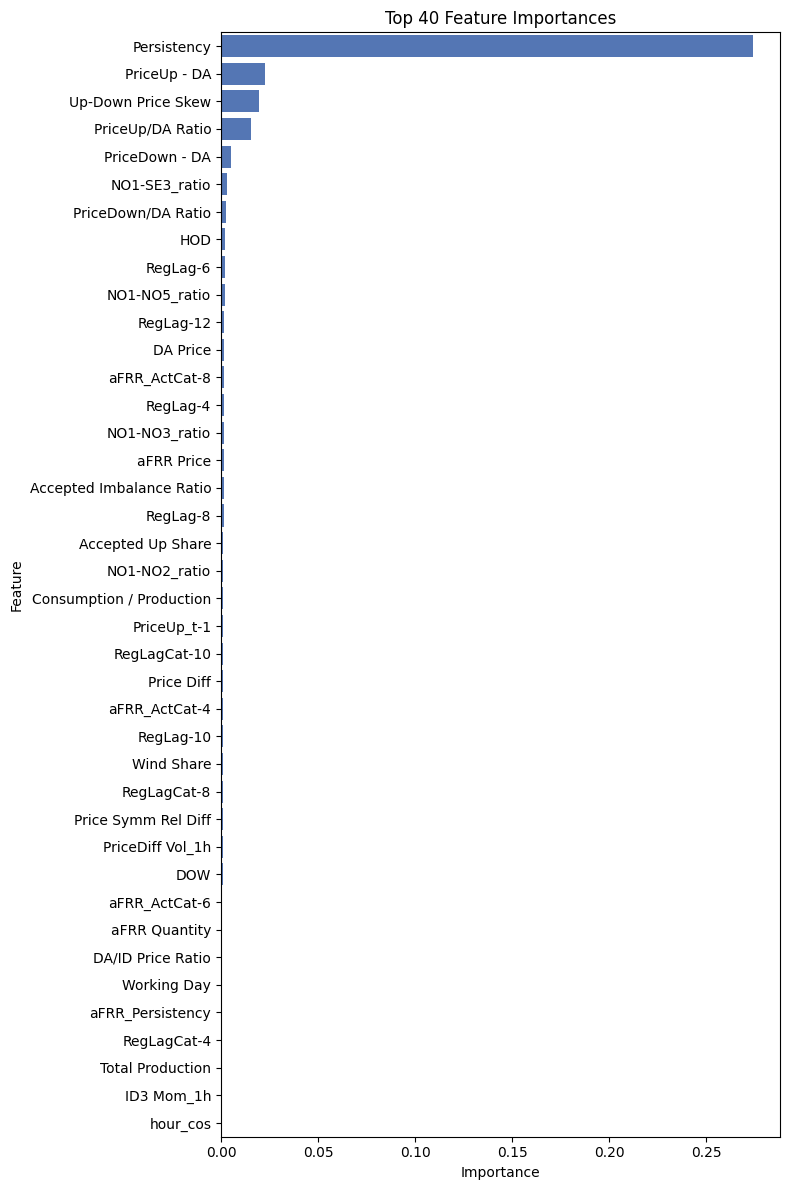

In [19]:
# 4. CatBoost-only + 4 HPO trials (NO1)
cat_hpo_cfg = base_common(area='NO1')
cat_hpo_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'cat_only_hpo4_no_bag'),
    time_limit=240,
    presets='best_quality',
    model_preset='cat_only',
    hpo_trials=4, hpo_searcher='random', hpo_scheduler='local',
))
# Uncomment to run
run_training('CatBoost-only HPO(4) NO1', **cat_hpo_cfg)

In [20]:
# 5. Baseline RF/XT priority for NO2 (area switch)
no2_baseline_cfg = base_common(area='NO2')
no2_baseline_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'baseline_rf_xt_priority_NO2'),
    time_limit=120,
    presets='best_quality',
    model_preset='rf_xt_priority',
    hpo_trials=0, hpo_searcher='random', hpo_scheduler='local',
))
# Uncomment to run
# run_training('Baseline RF/XT Priority NO2', **no2_baseline_cfg)

In [21]:
# 6. Stacking example (rf_xt_boost_stack) with modest time limit
stack_cfg = base_common(area='NO1')
stack_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'stack_rf_xt_boost'),
    time_limit=300,
    presets='best_quality',
    model_preset='rf_xt_boost_stack',
    num_bag_folds=0, num_stack_levels=0,  # keep disabled per requirement
    hpo_trials=0,
))
# Uncomment to run
# run_training('Stack Config (no actual bag/stack) NO1', **stack_cfg)

In [22]:
# 7. Batch runner: choose which configs to execute in sequence
batch = [
    # ('Baseline NO1', baseline_cfg),
    # ('CatBoost HPO4 NO1', cat_hpo_cfg),
    # ('Baseline NO2', no2_baseline_cfg),
]
results = {}
for name, cfg in batch:
    metrics = run_training(name, **cfg)
    results[name] = metrics
if results:
    print('Summary (macro F1):', {k: v.get('val_f1_macro') for k, v in results.items()})

### Notes
- Increase `time_limit` substantially (e.g., 1800+) for higher quality models.
- Set class weighting (e.g., `weight_factor_up=1.3`) to emphasize minority classes.
- Enable categorical RegLag features via `use_categorical_reglag=True` if desired.
- For persistence across re-runs, choose distinct `output_dir` names.

=== Run: XGBoost-only BASELINE NO1 LIGHT ===
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.25 GB / 13.85 GB (23.5%)
Disk Space Avail:   402.69 GB / 952.62 GB (42.3%)
Presets specified: ['medium_quality']
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.25 GB / 13.85 GB (23.5%)
Disk Space Avail:   402.69 GB / 952.62 GB (42.3%)
Presets specified: ['medium_quality']


Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 65)
Dataset splits: train=38007, val=12669, test=12669 (total=63345)


Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "c:\PythonProjects\rl_reserve_markets\upreg_classify\models\xgb_only_baseline_light"
Train Data Rows:    38007
Train Data Columns: 64
Tuning Data Rows:    12669
Tuning Data Columns: 64
Label Column:       RegClass+4
Problem Type:       multiclass
Preprocessing data ...
AutoGluon will save models to "c:\PythonProjects\rl_reserve_markets\upreg_classify\models\xgb_only_baseline_light"
Train Data Rows:    38007
Train Data Columns: 64
Tuning Data Rows:    12669
Tuning Data Columns: 64
Label Column:       RegClass+4
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
Cannot interpret 'Int8Dtype()' as a data type
	Available Memory:                    3276.21 MB
Fitting AutoMLPipelineFeatureGenerator...
Cannot interpr

Tuning up-multiplier alpha=0.75: F1(up)=0.3078, F1(macro)=0.5740
Tuning up-multiplier alpha=0.90: F1(up)=0.3881, F1(macro)=0.6014
Tuning up-multiplier alpha=1.00: F1(up)=0.4128, F1(macro)=0.6097
Tuning up-multiplier alpha=1.10: F1(up)=0.4157, F1(macro)=0.6103
Tuning up-multiplier alpha=1.18: F1(up)=0.4221, F1(macro)=0.6126
Tuning up-multiplier alpha=1.25: F1(up)=0.4226, F1(macro)=0.6125
Tuning up-multiplier alpha=1.30: F1(up)=0.4267, F1(macro)=0.6137
Tuning up-multiplier alpha=1.38: F1(up)=0.4250, F1(macro)=0.6129
Tuning up-multiplier alpha=1.45: F1(up)=0.4242, F1(macro)=0.6126
Tuning up-multiplier alpha=1.50: F1(up)=0.4230, F1(macro)=0.6122
Tuning up-multiplier alpha=1.75: F1(up)=0.3954, F1(macro)=0.5998
Tuning up-multiplier alpha=2.00: F1(up)=0.3283, F1(macro)=0.5653
Tuning up-multiplier alpha=1.30: F1(up)=0.4267, F1(macro)=0.6137
Tuning up-multiplier alpha=1.38: F1(up)=0.4250, F1(macro)=0.6129
Tuning up-multiplier alpha=1.45: F1(up)=0.4242, F1(macro)=0.6126
Tuning up-multiplier alph

These features in provided data are not utilized by the predictor and will be ignored: ['NO1-NO2_ratio_dup1', 'NO1-NO3_ratio_dup1', 'NO1-NO5_ratio_dup1', 'NO1-SE3_ratio_dup1']
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
	16.0s	= Expected runtime (1.6s per shuffle set)
	16.0s	= Expected runtime (1.6s per shuffle set)
	6.15s	= Actual runtime (Completed 10 of 10 shuffle sets)
	6.15s	= Actual runtime (Completed 10 of 10 shuffle sets)


Top feature importances:
  Persistency: 0.269144
  PriceUp/DA Ratio: 0.033333
  Up-Down Price Skew: 0.017899
  PriceUp - DA: 0.011434
  HOD: 0.007776
  PriceDown - DA: 0.007255
  DA Price: 0.002860
  Residual Load: 0.002296
  Consumption: 0.002044
  DA/ID Price Ratio: 0.001698
  Import/Consumption: 0.001426
  NO1-NO5_ratio: 0.001341
  Wind Production: 0.001291
  Accepted Up Share: 0.001210
  PriceDiff Mom_1h: 0.001194
  NO1-SE3_ratio: 0.001194
  DOW: 0.001149
  Price Symm Rel Diff: 0.000866
  Consumption / Production: 0.000790
  ID Price 3: 0.000672
  Wind Share: 0.000578
  NO1-NO2_ratio: 0.000509
  PriceUp_t-1: 0.000468
  PriceDown_t-1: 0.000401
  RegLagCat-4: 0.000282
  PriceDiff Vol_1h: 0.000280
  Price Diff: 0.000258
  aFRR_ActCat-8: 0.000199
  Total Imports: 0.000167
  RegLagCat-12: 0.000088
  Peak: 0.000065
  month_sin: 0.000023
  aFRR_ActCat-4: 0.000000
  aFRR_ActCat-6: 0.000000
  Net Import Ramp: 0.000000
  wind_error_t+2: 0.000000
  RegLagCat-8: 0.000000
  RegLag-8: 0.000000
 

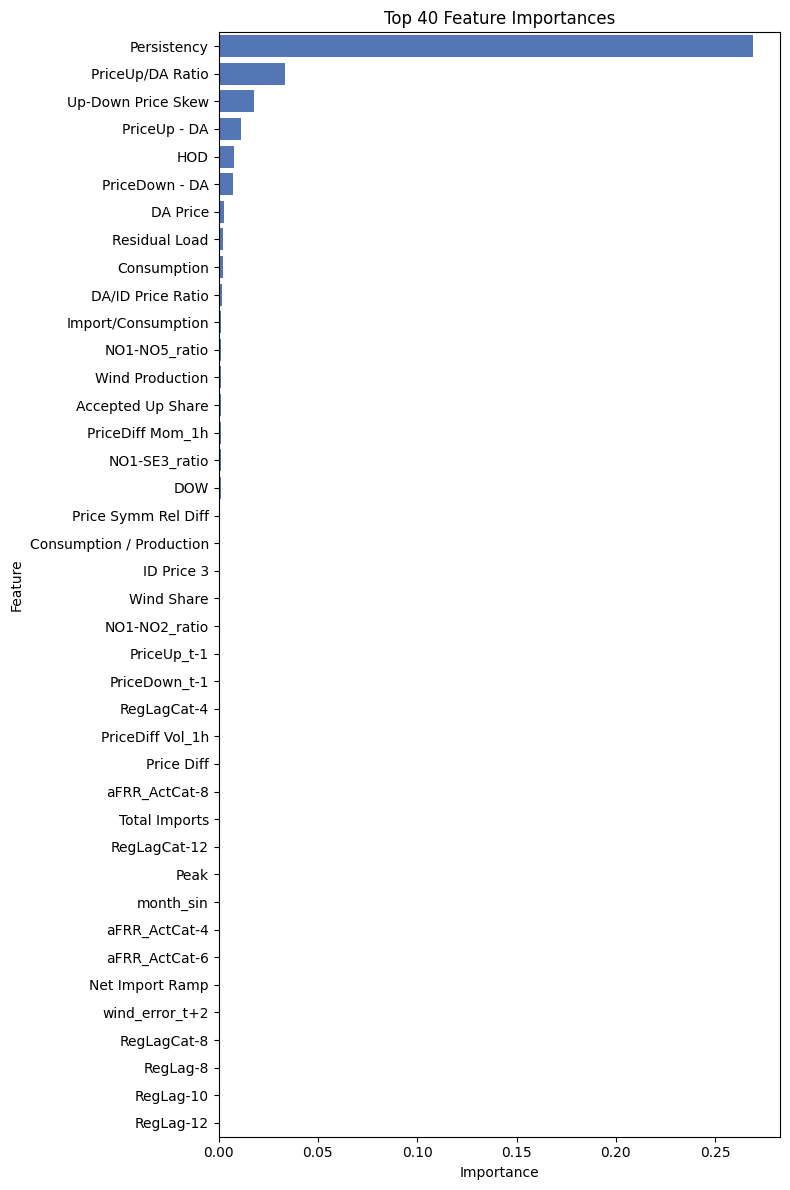

In [23]:
# XGBoost-only (no HPO) sanity run
xgb_cfg = base_common(area='NO1')
xgb_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'xgb_only_baseline_light'),
    time_limit=180,
    presets='medium_quality',
    model_preset='xgb_only',
    hpo_trials=0,               # disable HPO to isolate training
    hpo_searcher='random',
    hpo_scheduler='local',
    #data_start='2025-06-01',    # keep subset for speed
))
run_training('XGBoost-only BASELINE NO1 LIGHT', **xgb_cfg)


=== Run: XGBoost-only FULL FIXED VARIANTS NO1 ===
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 65)
Dataset splits: train=38007, val=12669, test=12669 (total=63345)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 65)
Dataset splits: train=38007, val=12669, test=12669 (total=63345)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.20 GB / 13.85 GB (23.1%)
Disk Space Avail:   402.66 GB / 952.62 GB (42.3%)
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.20 GB / 13.85 GB (23.1%)
Disk Space Avail:   402.66 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 1800s
AutoGluo

Tuning up-multiplier alpha=0.75: F1(up)=0.3878, F1(macro)=0.6111
Tuning up-multiplier alpha=0.90: F1(up)=0.4109, F1(macro)=0.6188
Tuning up-multiplier alpha=1.00: F1(up)=0.4227, F1(macro)=0.6228
Tuning up-multiplier alpha=1.10: F1(up)=0.4219, F1(macro)=0.6222
Tuning up-multiplier alpha=1.18: F1(up)=0.4278, F1(macro)=0.6239
Tuning up-multiplier alpha=1.25: F1(up)=0.4298, F1(macro)=0.6246
Tuning up-multiplier alpha=1.30: F1(up)=0.4294, F1(macro)=0.6243
Tuning up-multiplier alpha=1.38: F1(up)=0.4242, F1(macro)=0.6222
Tuning up-multiplier alpha=1.45: F1(up)=0.4190, F1(macro)=0.6198
Tuning up-multiplier alpha=1.50: F1(up)=0.4162, F1(macro)=0.6185
Tuning up-multiplier alpha=1.75: F1(up)=0.3348, F1(macro)=0.5814
Tuning up-multiplier alpha=1.30: F1(up)=0.4294, F1(macro)=0.6243
Tuning up-multiplier alpha=1.38: F1(up)=0.4242, F1(macro)=0.6222
Tuning up-multiplier alpha=1.45: F1(up)=0.4190, F1(macro)=0.6198
Tuning up-multiplier alpha=1.50: F1(up)=0.4162, F1(macro)=0.6185
Tuning up-multiplier alph

These features in provided data are not utilized by the predictor and will be ignored: ['NO1-NO2_ratio_dup1', 'NO1-NO3_ratio_dup1', 'NO1-NO5_ratio_dup1', 'NO1-SE3_ratio_dup1']
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
	42.09s	= Expected runtime (4.21s per shuffle set)
	42.09s	= Expected runtime (4.21s per shuffle set)
	11.61s	= Actual runtime (Completed 10 of 10 shuffle sets)
	11.61s	= Actual runtime (Completed 10 of 10 shuffle sets)


Top feature importances:
  Persistency: 0.283943
  PriceDown - DA: 0.009439
  Up-Down Price Skew: 0.007639
  HOD: 0.003529
  Residual Load: 0.001987
  Wind Share: 0.001847
  PriceUp/DA Ratio: 0.001681
  DA Price: 0.000960
  RegLag-4: 0.000899
  hour_sin: 0.000630
  month_cos: 0.000621
  PriceUp - DA: 0.000600
  Price Diff: 0.000584
  Total Imports: 0.000577
  PriceDown_t-1: 0.000569
  NO1-SE3_ratio: 0.000559
  PriceDown/DA Ratio: 0.000521
  PriceDiff Mom_1h: 0.000352
  NO1-NO5_ratio: 0.000282
  DA/ID Price Ratio: 0.000225
  RegLagCat-4: 0.000191
  aFRR_Persistency: 0.000179
  ID3 Mom_1h: 0.000179
  NO1-NO2_ratio: 0.000178
  NO1-NO3_ratio: 0.000122
  Consumption / Production: 0.000122
  aFRR Quantity: 0.000121
  Import/Consumption: 0.000115
  Total Production: 0.000082
  aFRR Price: 0.000064
  Residual Load Delta: 0.000063
  Accepted Up Share: 0.000040
  Working Day: 0.000000
  month_sin: 0.000000
  RegLag-12: 0.000000
  wind_error_t+4: 0.000000
  RegLag-8: 0.000000
  RegLagCat-8: 0.000

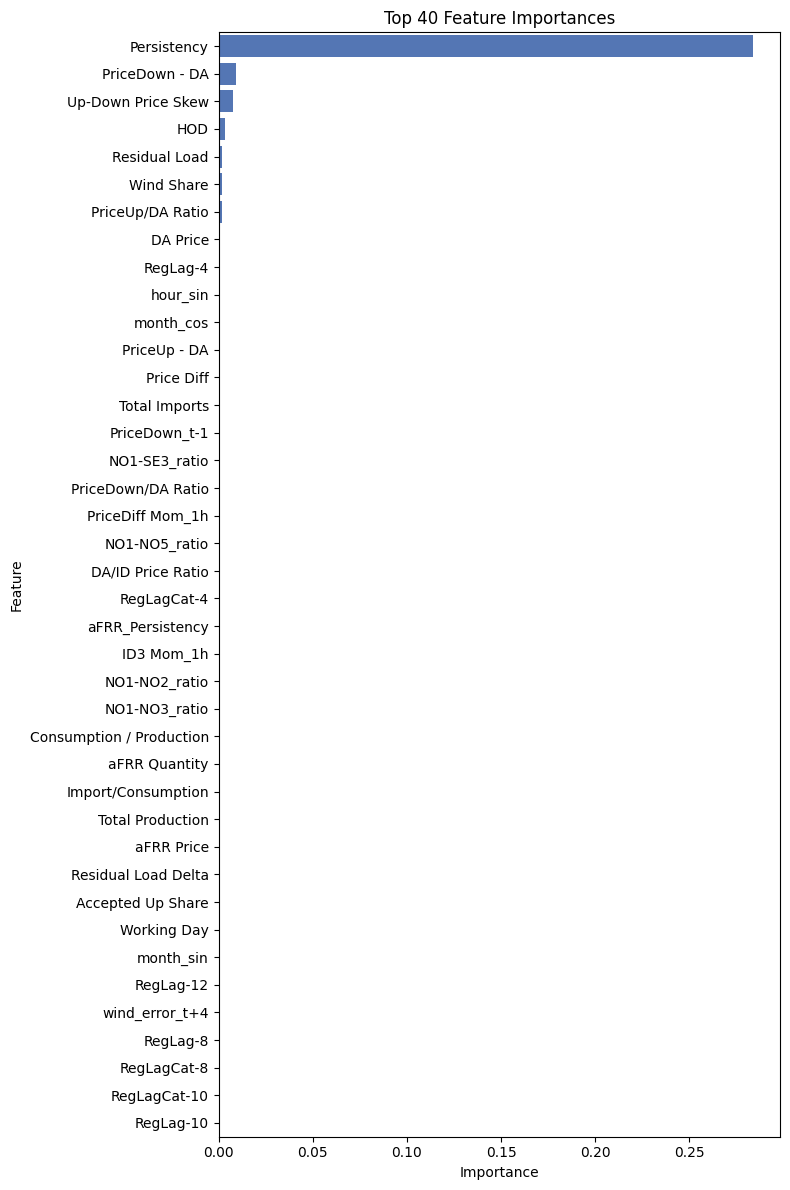

In [24]:
# 8. XGBoost-only FULL run (fixed variants, full data)
xgb_full_cfg = base_common(area='NO1')
xgb_full_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'xgb_only_full_fixed_actual'),
    time_limit=1800,             # 30 minutes budget; adjust as needed
    presets='best_quality',
    model_preset='xgb_only_fixed',
    hpo_trials=0,                # no HPO; use fixed variants
    hpo_searcher='random',
    hpo_scheduler='local',
    data_start=None,             # ensure full dataset
))
run_training('XGBoost-only FULL FIXED VARIANTS NO1', **xgb_full_cfg)


In [25]:
# 10. Inspect trained model families from saved predictors
from autogluon.tabular import TabularPredictor
paths = [
    MODELS_DIR / 'xgb_only_full_fixed',
    MODELS_DIR / 'xgb_only_full_fixed_actual',
    MODELS_DIR / 'xgb_only_full_hpo6',
    MODELS_DIR / 'xgb_only_full_hpo2_quick',
]
for p in paths:
    p = str(p)
    if Path(p).exists():
        try:
            pred = TabularPredictor.load(p)
            print(f'Path: {p}')
            print('Models:', pred.model_names())
        except Exception as e:
            print(f'Failed to load {p}:', e)


Path: c:\PythonProjects\rl_reserve_markets\upreg_classify\models\xgb_only_full_fixed
Models: ['NeuralNetFastAI', 'LightGBMXT', 'LightGBM', 'RandomForestGini', 'RandomForestEntr', 'CatBoost', 'ExtraTreesGini', 'ExtraTreesEntr', 'XGBoost', 'NeuralNetTorch', 'LightGBMLarge', 'CatBoost_r177', 'NeuralNetTorch_r79', 'LightGBM_r131', 'NeuralNetFastAI_r191', 'CatBoost_r9', 'LightGBM_r96', 'NeuralNetTorch_r22', 'XGBoost_r33', 'ExtraTrees_r42', 'CatBoost_r137', 'NeuralNetFastAI_r102', 'CatBoost_r13', 'RandomForest_r195', 'LightGBM_r188', 'NeuralNetFastAI_r145', 'XGBoost_r89', 'NeuralNetTorch_r30', 'LightGBM_r130', 'NeuralNetTorch_r86', 'CatBoost_r50', 'NeuralNetFastAI_r11', 'ExtraTrees_r172', 'CatBoost_r69', 'NeuralNetFastAI_r103', 'NeuralNetTorch_r14', 'LightGBM_r161', 'NeuralNetFastAI_r143', 'CatBoost_r70', 'NeuralNetFastAI_r156', 'LightGBM_r196', 'RandomForest_r39', 'CatBoost_r167', 'NeuralNetFastAI_r95', 'NeuralNetTorch_r41', 'LightGBM_r15', 'NeuralNetTorch_r158', 'CatBoost_r86', 'NeuralNetF

In [26]:
# 11. Force-reload training modules to pick up latest hyperparameter presets
import importlib
import src.train.hyperparameters as hp
import src.train.train as tr
hp = importlib.reload(hp)
tr = importlib.reload(tr)
from src.train.hyperparameters import build_hyperparameters
print('xgb_only_fixed keys:', list(build_hyperparameters('xgb_only_fixed', hpo_trials=0).keys()))


xgb_only_fixed keys: ['XGB']


=== Run: XGB FIXED SUBSET CHECK ===
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)


Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 65)
Dataset splits: train=38007, val=12669, test=12669 (total=63345)
Applied dataset start filter: from 2025-03-04 -> rows: 23985 (train 14391, val 4797, test 4797)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.63 GB / 13.85 GB (26.2%)
Disk Space Avail:   402.62 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.63 GB / 13.85 GB (26.2%)
Disk Space Avail:   402.62 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "c:\Python

Tuning up-multiplier alpha=0.75: F1(up)=0.0039, F1(macro)=0.4440
Tuning up-multiplier alpha=0.90: F1(up)=0.0624, F1(macro)=0.4633
Tuning up-multiplier alpha=1.00: F1(up)=0.1185, F1(macro)=0.4822
Tuning up-multiplier alpha=1.10: F1(up)=0.1746, F1(macro)=0.5011
Tuning up-multiplier alpha=1.18: F1(up)=0.2102, F1(macro)=0.5127
Tuning up-multiplier alpha=1.25: F1(up)=0.2412, F1(macro)=0.5232
Tuning up-multiplier alpha=1.30: F1(up)=0.2560, F1(macro)=0.5283
Tuning up-multiplier alpha=1.38: F1(up)=0.2667, F1(macro)=0.5318
Tuning up-multiplier alpha=1.45: F1(up)=0.2749, F1(macro)=0.5334
Tuning up-multiplier alpha=1.50: F1(up)=0.3046, F1(macro)=0.5438
Tuning up-multiplier alpha=1.75: F1(up)=0.3219, F1(macro)=0.5470
Tuning up-multiplier alpha=2.00: F1(up)=0.3356, F1(macro)=0.5484
Tuning up-multiplier alpha=2.50: F1(up)=0.3415, F1(macro)=0.5448
Tuning up-multiplier alpha=3.00: F1(up)=0.3127, F1(macro)=0.5206
Tuning up-multiplier alpha=3.50: F1(up)=0.2776, F1(macro)=0.4773
Tuning up-multiplier alph

These features in provided data are not utilized by the predictor and will be ignored: ['NO1-NO2_ratio_dup1', 'NO1-NO3_ratio_dup1', 'NO1-NO5_ratio_dup1', 'NO1-SE3_ratio_dup1', 'wind_error_t+4', 'wind_error_t+2']
Computing feature importance via permutation shuffling for 58 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
Computing feature importance via permutation shuffling for 58 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
	39.87s	= Expected runtime (3.99s per shuffle set)
	39.87s	= Expected runtime (3.99s per shuffle set)
	9.21s	= Actual runtime (Completed 10 of 10 shuffle sets)
	9.21s	= Actual runtime (Completed 10 of 10 shuffle sets)


Top feature importances:
  Persistency: 0.074133
  RegLagCat-4: 0.031424
  PriceDown - DA: 0.014609
  DA Price: 0.014285
  PriceUp/DA Ratio: 0.012365
  HOD: 0.012283
  Up-Down Price Skew: 0.011354
  RegLagCat-6: 0.006557
  Residual Load: 0.005937
  Price Symm Rel Diff: 0.005525
  ID Price 3: 0.005105
  NO1-SE3_ratio: 0.004785
  hour_sin: 0.004751
  PriceUp - DA: 0.004733
  NO1-NO3_ratio: 0.004076
  PriceDown_t-1: 0.003726
  Price Diff: 0.001977
  aFRR_Persistency: 0.001905
  DA/ID Price Ratio: 0.001864
  NO1-NO5_ratio: 0.001683
  PriceDown/DA Ratio: 0.001621
  hour_cos: 0.000896
  Working Day: 0.000738
  Import/Consumption: 0.000637
  PriceDiff Mom_1h: 0.000494
  aFRR Price: 0.000361
  Total Production: 0.000285
  Accepted Imbalance Ratio: 0.000207
  RegLagCat-8: 0.000116
  DOW: 0.000060
  RegLagCat-12: 0.000059
  Net Import Ramp: 0.000006
  ID3 Mom_1h: 0.000000
  Peak: 0.000000
  RegLag-4: 0.000000
  RegLag-10: 0.000000
  RegLagCat-10: 0.000000
  RegLag-12: 0.000000
  RegLag-8: 0.0000

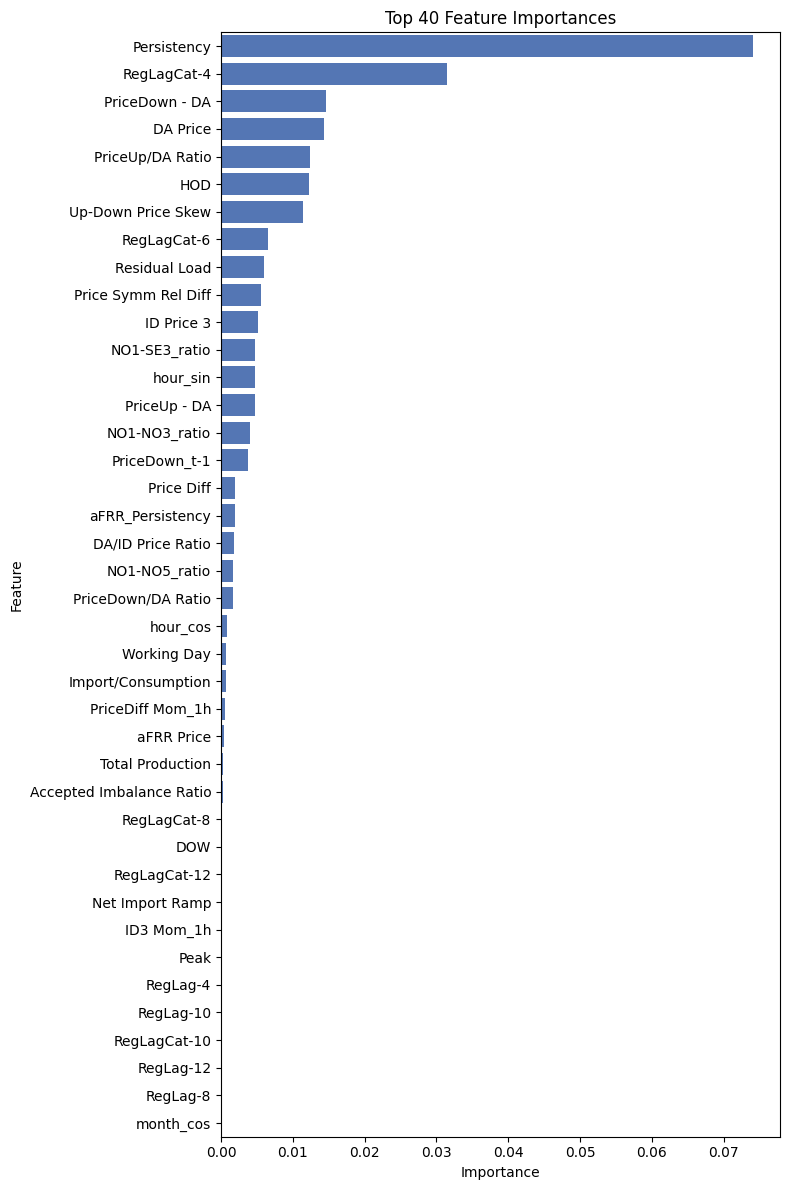

In [27]:
# 12. Sanity: XGBoost-only FIXED on subset, verify model families
xgb_subset_cfg = base_common(area='NO1')
xgb_subset_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'xgb_only_fixed_subset_check'),
    time_limit=1000,
    presets='best_quality',
    model_preset='xgb_only_fixed',
    hpo_trials=5,
    data_start='2025-03-04',
))
metrics = run_training('XGB FIXED SUBSET CHECK', **xgb_subset_cfg)
# Show trained models
pred = TabularPredictor.load(xgb_subset_cfg['output_dir'])
print('Models:', pred.model_names())


--- Reloading project modules ---
Reloaded: preprocess, features, hyperparameters, train
=== Run: CAT ONLY SUBSET CHECK ===
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 69)
Dataset splits: train=38007, val=12669, test=12669 (total=63345)
Applied dataset start filter: from 2025-03-04 -> rows: 23985 (train 14391, val 4797, test 4797)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.19 GB / 13.85 GB (23.1%)
Disk Space Avail:   402.64 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.19 GB / 13.85 GB (23.1%)
Disk Space Avail:   402.64 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon

  0%|          | 0/2 [00:00<?, ?it/s]

Fitted model: CatBoost\T1 ...
	0.4455	 = Validation score   (f1_macro)
	14.62s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: CatBoost\T2 ...
	0.4455	 = Validation score   (f1_macro)
	14.62s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: CatBoost\T2 ...
	0.4428	 = Validation score   (f1_macro)
	10.73s	 = Training   runtime
	0.01s	 = Validation runtime
	0.4428	 = Validation score   (f1_macro)
	10.73s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 572.63s of remaining time.
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 572.63s of remaining time.
	Ensemble Weights: {'CatBoost\T1': 1.0}
	0.4455	 = Validation score   (f1_macro)
	0.25s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 27.67s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 267486.6 rows/s (4797 batch size)
	Ens

Tuning up-multiplier alpha=0.75: F1(up)=0.0079, F1(macro)=0.4411
Tuning up-multiplier alpha=0.90: F1(up)=0.0078, F1(macro)=0.4405
Tuning up-multiplier alpha=1.00: F1(up)=0.0230, F1(macro)=0.4455
Tuning up-multiplier alpha=1.10: F1(up)=0.0340, F1(macro)=0.4488
Tuning up-multiplier alpha=1.18: F1(up)=0.0374, F1(macro)=0.4502
Tuning up-multiplier alpha=1.25: F1(up)=0.0518, F1(macro)=0.4550
Tuning up-multiplier alpha=1.30: F1(up)=0.0548, F1(macro)=0.4559
Tuning up-multiplier alpha=1.38: F1(up)=0.0581, F1(macro)=0.4570
Tuning up-multiplier alpha=1.45: F1(up)=0.0707, F1(macro)=0.4613
Tuning up-multiplier alpha=1.50: F1(up)=0.0833, F1(macro)=0.4653
Tuning up-multiplier alpha=1.75: F1(up)=0.1209, F1(macro)=0.4779
Tuning up-multiplier alpha=2.00: F1(up)=0.1588, F1(macro)=0.4900
Tuning up-multiplier alpha=2.50: F1(up)=0.2122, F1(macro)=0.5065
Tuning up-multiplier alpha=3.00: F1(up)=0.2657, F1(macro)=0.5220
Tuning up-multiplier alpha=3.50: F1(up)=0.2876, F1(macro)=0.5264
Tuning up-multiplier alph

These features in provided data are not utilized by the predictor and will be ignored: ['NO1-NO2_ratio_dup1', 'NO1-NO3_ratio_dup1', 'NO1-NO5_ratio_dup1', 'NO1-SE3_ratio_dup1', 'Persistency', 'PersistencyDown', 'wind_error_t+4', 'wind_error_t+2']
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
	10.65s	= Expected runtime (1.07s per shuffle set)
	10.65s	= Expected runtime (1.07s per shuffle set)
	2.13s	= Actual runtime (Completed 10 of 10 shuffle sets)
	2.13s	= Actual runtime (Completed 10 of 10 shuffle sets)


Top feature importances:
  PersistenceNone: 0.012417
  RegLag-4: 0.009260
  DA Price: 0.008551
  PriceDown - DA: 0.006822
  hour_sin: 0.005922
  RegLag-6: 0.005275
  PriceUp/DA Ratio: 0.004574
  aFRR_Persistency: 0.004302
  PersistenceDown: 0.003752
  Up-Down Price Skew: 0.003503
  HOD: 0.003203
  PriceUp_t-1: 0.003178
  aFRR Quantity: 0.003029
  PersistenceUp: 0.002957
  NO1-NO3_ratio: 0.002918
  Wind Production: 0.002761
  RegLag-8: 0.002482
  PriceUp - DA: 0.002210
  Total Production: 0.001969
  Accepted Imbalance Ratio: 0.001722
  Price Diff: 0.001478
  month_cos: 0.001361
  NO1-NO2_ratio: 0.001279
  hour_cos: 0.000939
  ID Price 3: 0.000720
  RegLag-10: 0.000688
  Peak: 0.000462
  Price Symm Rel Diff: 0.000450
  NO1-NO5_ratio: 0.000381
  Accepted Up Share: 0.000379
  Residual Load: 0.000325
  Net Import: 0.000176
  DA/ID Price Ratio: 0.000111
  DOW: 0.000026
  Import/Consumption: 0.000016
  DA Scarcity: 0.000001
  RegLagCat-4: 0.000000
  PriceDown_t-1: 0.000000
  RegLag-12: 0.0000

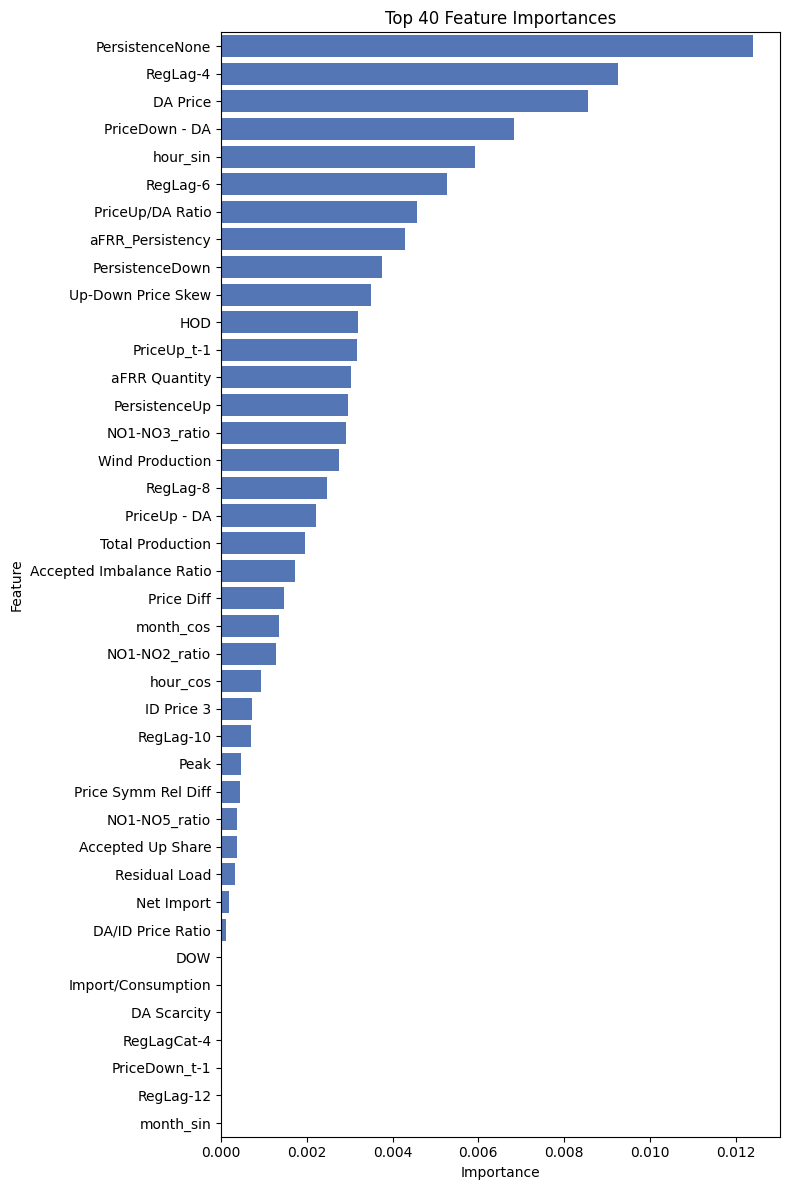

In [28]:
# 13. Sanity: CatBoost-only on subset, mirror cfg of #12
from src.train.train import train_and_evaluate
reload_all()
cat_subset_cfg = base_common(area='NO1')
cat_subset_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'cat_only_subset_check'),
    time_limit=600,
    presets='best_quality',
    model_preset='cat_only',
    hpo_trials=2,
    data_start='2025-03-04',
))
metrics = run_training('CAT ONLY SUBSET CHECK', **cat_subset_cfg)
# Show trained models
pred = TabularPredictor.load(cat_subset_cfg['output_dir'])
print('Models:', pred.model_names())


=== Run: LGBM ONLY SUBSET CHECK ===
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 69)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 69)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.19 GB / 13.85 GB (23.0%)
Disk Space Avail:   402.64 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.19 GB / 13.85 GB (23.0%)
Disk Space Avail:   402.64 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1


Dataset splits: train=38007, val=12669, test=12669 (total=63345)
Applied dataset start filter: from 2025-03-04 -> rows: 23985 (train 14391, val 4797, test 4797)


Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "c:\PythonProjects\rl_reserve_markets\upreg_classify\models\lgbm_only_subset_check"
Train Data Rows:    14391
Train Data Columns: 68
Tuning Data Rows:    4797
Tuning Data Columns: 68
Label Column:       RegClass+4
Problem Type:       multiclass
Preprocessing data ...
AutoGluon will save models to "c:\PythonProjects\rl_reserve_markets\upreg_classify\models\lgbm_only_subset_check"
Train Data Rows:    14391
Train Data Columns: 68
Tuning Data Rows:    4797
Tuning Data Columns: 68
Label Column:       RegClass+4
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
Cannot interpret 'Int8Dtype()' as a data type
Cannot interpret 'Int8Dtype()' as a data type
	Available Memory:  

Tuning up-multiplier alpha=0.75: F1(up)=0.0039, F1(macro)=0.4274
Tuning up-multiplier alpha=0.90: F1(up)=0.0078, F1(macro)=0.4285
Tuning up-multiplier alpha=1.00: F1(up)=0.0078, F1(macro)=0.4285
Tuning up-multiplier alpha=1.10: F1(up)=0.0078, F1(macro)=0.4284
Tuning up-multiplier alpha=1.18: F1(up)=0.0078, F1(macro)=0.4284
Tuning up-multiplier alpha=1.25: F1(up)=0.0115, F1(macro)=0.4297
Tuning up-multiplier alpha=1.30: F1(up)=0.0115, F1(macro)=0.4296
Tuning up-multiplier alpha=1.38: F1(up)=0.0189, F1(macro)=0.4322
Tuning up-multiplier alpha=1.45: F1(up)=0.0224, F1(macro)=0.4330
Tuning up-multiplier alpha=1.50: F1(up)=0.0258, F1(macro)=0.4339
Tuning up-multiplier alpha=1.75: F1(up)=0.0394, F1(macro)=0.4381
Tuning up-multiplier alpha=2.00: F1(up)=0.0615, F1(macro)=0.4448
Tuning up-multiplier alpha=2.50: F1(up)=0.1236, F1(macro)=0.4645
Tuning up-multiplier alpha=3.00: F1(up)=0.1746, F1(macro)=0.4795
Tuning up-multiplier alpha=3.50: F1(up)=0.2172, F1(macro)=0.4917
Tuning up-multiplier alph

These features in provided data are not utilized by the predictor and will be ignored: ['NO1-NO2_ratio_dup1', 'NO1-NO3_ratio_dup1', 'NO1-NO5_ratio_dup1', 'NO1-SE3_ratio_dup1', 'Persistency', 'PersistencyDown', 'wind_error_t+4', 'wind_error_t+2']
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
	7.79s	= Expected runtime (0.78s per shuffle set)
	7.79s	= Expected runtime (0.78s per shuffle set)
	3.21s	= Actual runtime (Completed 10 of 10 shuffle sets)
	3.21s	= Actual runtime (Completed 10 of 10 shuffle sets)


Top feature importances:
  PersistenceNone: 0.021362
  PriceDown - DA: 0.016721
  RegLag-4: 0.012376
  DA Price: 0.009520
  NO1-NO3_ratio: 0.006444
  PersistenceDown: 0.004601
  PriceUp_t-1: 0.004595
  hour_sin: 0.003733
  hour_cos: 0.002365
  NO1-SE3_ratio: 0.002119
  Wind Share: 0.002086
  Up-Down Price Skew: 0.002006
  DA/ID Price Ratio: 0.001984
  RegLag-6: 0.001936
  Total Imports: 0.001910
  PriceUp - DA: 0.001671
  Price Diff: 0.001642
  HOD: 0.001565
  ID Price 3: 0.001253
  Accepted Up Share: 0.001173
  Wind Production: 0.000988
  NO1-NO2_ratio: 0.000975
  aFRR Quantity: 0.000671
  aFRR Price: 0.000586
  aFRR_Persistency: 0.000522
  DOW: 0.000315
  Import/Consumption: 0.000232
  PriceDown/DA Ratio: 0.000221
  RegLagCat-12: 0.000170
  ID3 Mom_1h: 0.000169
  Total Production: 0.000152
  aFRR_ActCat-6: 0.000059
  Residual Load Delta: 0.000056
  RegLag-8: 0.000024
  PriceDiff Vol_1h: 0.000000
  Net Import Ramp: 0.000000
  RegLagCat-6: 0.000000
  RegLagCat-8: 0.000000
  month_cos: 

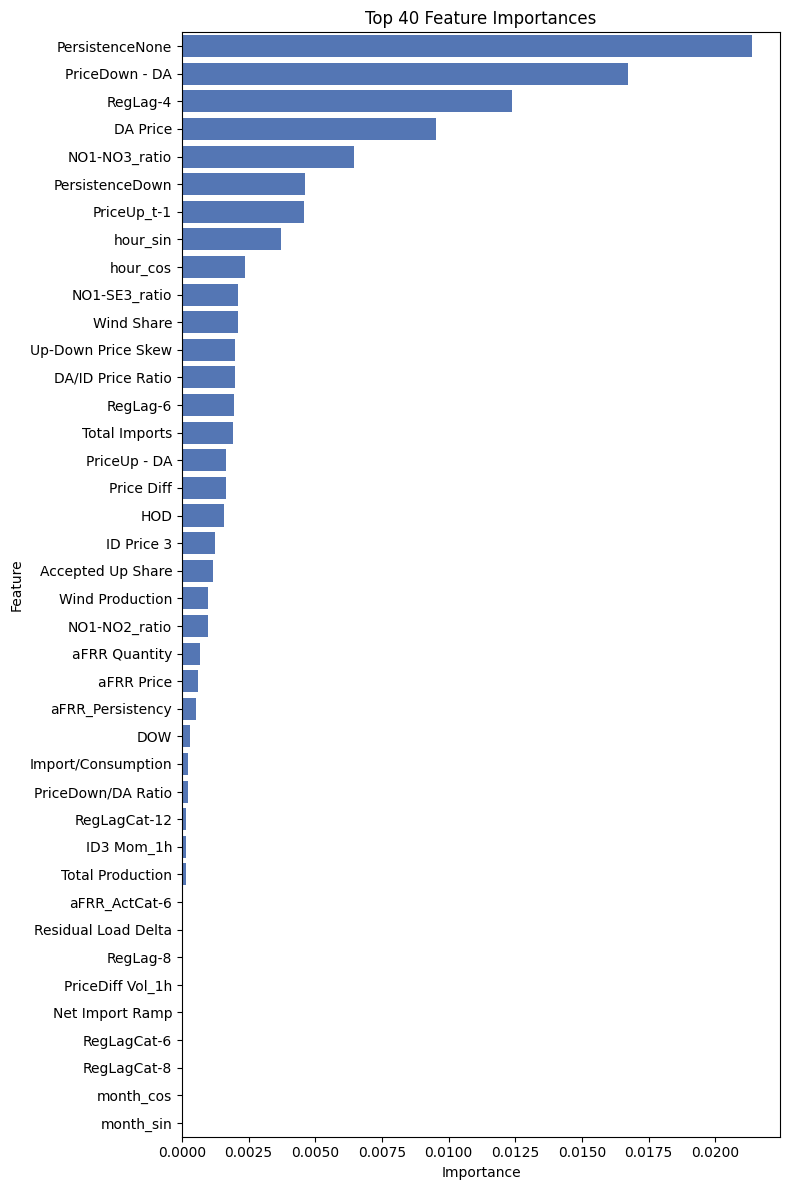

In [29]:
# 14. Sanity: LightGBM-only on subset, mirror cfg of #12
lgbm_subset_cfg = base_common(area='NO1')
lgbm_subset_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'lgbm_only_subset_check'),
    time_limit=1000,
    presets='best_quality',
    model_preset='lgbm_only',
    hpo_trials=0,
    data_start='2025-03-04',
))
metrics = run_training('LGBM ONLY SUBSET CHECK', **lgbm_subset_cfg)
# Show trained models
pred = TabularPredictor.load(lgbm_subset_cfg['output_dir'])
print('Models:', pred.model_names())


=== Run: XGB FIXED SUBSET NO INTERACTIONS ===
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 69)
Dataset splits: train=38007, val=12669, test=12669 (total=63345)
Applied dataset start filter: from 2025-03-04 -> rows: 23985 (train 14391, val 4797, test 4797)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 69)
Dataset splits: train=38007, val=12

Verbosity: 2 (Standard Logging)
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.60 GB / 13.85 GB (26.0%)
Disk Space Avail:   402.64 GB / 952.62 GB (42.3%)
Presets specified: ['medium_quality']
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.60 GB / 13.85 GB (26.0%)
Disk Space Avail:   402.64 GB / 952.62 GB (42.3%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "c:\PythonProjects\rl_reserve_markets\upreg_classify\models\xgb_fixed_subset_no_interactions"
Train Data Rows:    14391
Train Data Columns: 68
Tuning Data Ro

Tuning up-multiplier alpha=0.75: F1(up)=0.0000, F1(macro)=0.4150
Tuning up-multiplier alpha=0.90: F1(up)=0.0000, F1(macro)=0.4150
Tuning up-multiplier alpha=1.00: F1(up)=0.1061, F1(macro)=0.4452
Tuning up-multiplier alpha=1.10: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=1.18: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=1.25: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=1.30: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=1.38: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=1.45: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=1.50: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=1.75: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=2.00: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=2.50: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=3.00: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alpha=3.50: F1(up)=0.1908, F1(macro)=0.0636
Tuning up-multiplier alph

These features in provided data are not utilized by the predictor and will be ignored: ['NO1-NO2_ratio_dup1', 'NO1-NO3_ratio_dup1', 'NO1-NO5_ratio_dup1', 'NO1-SE3_ratio_dup1', 'Persistency', 'PersistencyDown', 'wind_error_t+4', 'wind_error_t+2']
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
	30.22s	= Expected runtime (3.02s per shuffle set)
	30.22s	= Expected runtime (3.02s per shuffle set)
	6.01s	= Actual runtime (Completed 10 of 10 shuffle sets)
	6.01s	= Actual runtime (Completed 10 of 10 shuffle sets)


Top feature importances:
  PriceUp_t-1: 0.026757
  PriceDown - DA: 0.025099
  RegLagCat-4: 0.024401
  aFRR_Persistency: 0.017309
  RegLag-4: 0.015460
  hour_sin: 0.010282
  NO1-NO3_ratio: 0.009521
  ID Price 3: 0.008732
  Price Symm Rel Diff: 0.008506
  NO1-NO2_ratio: 0.006148
  PriceUp - DA: 0.004470
  NO1-NO5_ratio: 0.004193
  Wind Share: 0.004055
  PriceDiff Vol_1h: 0.002652
  NO1-SE3_ratio: 0.002106
  RegLagCat-10: 0.002078
  DA/ID Price Ratio: 0.001827
  Accepted Up Share: 0.001489
  Wind Production: 0.001065
  Net Import: 0.000967
  aFRR_ActCat-4: 0.000895
  PriceDiff Mom_1h: 0.000881
  Working Day: 0.000517
  Import/Consumption: 0.000386
  DOW: 0.000338
  Accepted Imbalance Ratio: 0.000217
  RegLagCat-12: 0.000190
  Total Imports: 0.000062
  PriceDown/DA Ratio: 0.000000
  Net Import Ramp: 0.000000
  HOD: 0.000000
  DA Scarcity: 0.000000
  aFRR Price: 0.000000
  month_sin: 0.000000
  PersistenceNone: 0.000000
  Peak: 0.000000
  RegLag-8: 0.000000
  RegLagCat-6: 0.000000
  RegLagC

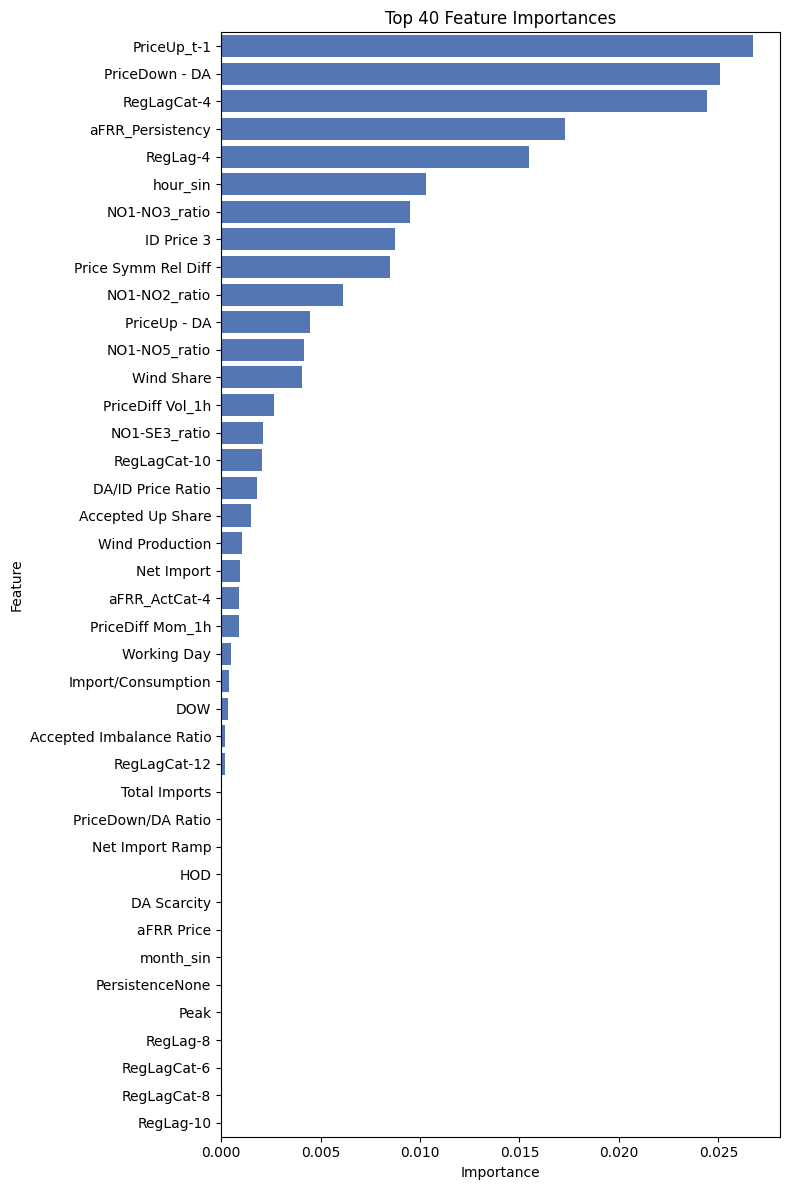

In [30]:
# 15. Subset run with persistency interactions disabled (XGB fixed)
xgb_no_inter_subset_cfg = base_common(area='NO1')
xgb_no_inter_subset_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'xgb_fixed_subset_no_interactions'),
    time_limit=600,
    presets='medium_quality',
    model_preset='xgb_only_fixed',
    hpo_trials=0,
    data_start='2025-03-04',
    disable_persistency_interactions=True,
))
metrics = run_training('XGB FIXED SUBSET NO INTERACTIONS', **xgb_no_inter_subset_cfg)
# Show trained models
pred = TabularPredictor.load(xgb_no_inter_subset_cfg['output_dir'])
print('Models:', pred.model_names())


=== Run: LGBM ONLY HPO(4) SUBSET CHECK ===
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Flow index range: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 69)
Final index range pre-dropna: 2024-01-01 00:00:00 -> 2025-11-13 23:45:00 (rows=65568)
Consumption shape: (65568, 1)
Production shape: (65568, 8)
Day-ahead prices shape: (65760, 2)
Intraday hourly stats shape: (65565, 13)
Number of NaNs before dropna: 13471
Final preprocessed DataFrame shape: (63345, 69)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.60 GB / 13.85 GB (26.0%)
Disk Space Avail:   402.64 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       3.60 GB / 13.85 GB (26.0%)
Disk Space Avail:   402.64 GB / 952.62 GB (42.3%)
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1


Dataset splits: train=38007, val=12669, test=12669 (total=63345)
Applied dataset start filter: from 2025-03-04 -> rows: 23985 (train 14391, val 4797, test 4797)


Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "c:\PythonProjects\rl_reserve_markets\upreg_classify\models\lgbm_only_subset_hpo"
Train Data Rows:    14391
Train Data Columns: 68
Tuning Data Rows:    4797
Tuning Data Columns: 68
Label Column:       RegClass+4
Problem Type:       multiclass
Preprocessing data ...
AutoGluon will save models to "c:\PythonProjects\rl_reserve_markets\upreg_classify\models\lgbm_only_subset_hpo"
Train Data Rows:    14391
Train Data Columns: 68
Tuning Data Rows:    4797
Tuning Data Columns: 68
Label Column:       RegClass+4
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
Cannot interpret 'Int8Dtype()' as a data type
	Available Memory:                    3672.99 MB
	Train Data (Original)

  0%|          | 0/4 [00:00<?, ?it/s]

Fitted model: LightGBM\T1 ...
	0.4337	 = Validation score   (f1_macro)
	2.77s	 = Training   runtime
	0.02s	 = Validation runtime
	0.4337	 = Validation score   (f1_macro)
	2.77s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM\T2 ...
	0.4279	 = Validation score   (f1_macro)
	3.64s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T2 ...
	0.4279	 = Validation score   (f1_macro)
	3.64s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T3 ...
	0.4279	 = Validation score   (f1_macro)
	2.91s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T3 ...
	0.4279	 = Validation score   (f1_macro)
	2.91s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T4 ...
	0.4344	 = Validation score   (f1_macro)
	2.52s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T4 ...
	0.4344	 = Validation score   (f1_macro)
	2.52s	 = Training   runtime
	0.01s	 = Validation runtim

Tuning up-multiplier alpha=0.75: F1(up)=0.0039, F1(macro)=0.4246
Tuning up-multiplier alpha=0.90: F1(up)=0.0271, F1(macro)=0.4326
Tuning up-multiplier alpha=1.00: F1(up)=0.0340, F1(macro)=0.4344
Tuning up-multiplier alpha=1.10: F1(up)=0.0480, F1(macro)=0.4388
Tuning up-multiplier alpha=1.18: F1(up)=0.0577, F1(macro)=0.4416
Tuning up-multiplier alpha=1.25: F1(up)=0.0701, F1(macro)=0.4453
Tuning up-multiplier alpha=1.30: F1(up)=0.0793, F1(macro)=0.4482
Tuning up-multiplier alpha=1.38: F1(up)=0.0853, F1(macro)=0.4502
Tuning up-multiplier alpha=1.45: F1(up)=0.0908, F1(macro)=0.4517
Tuning up-multiplier alpha=1.50: F1(up)=0.0960, F1(macro)=0.4530
Tuning up-multiplier alpha=1.75: F1(up)=0.1281, F1(macro)=0.4631
Tuning up-multiplier alpha=2.00: F1(up)=0.1789, F1(macro)=0.4794
Tuning up-multiplier alpha=2.50: F1(up)=0.2364, F1(macro)=0.4974
Tuning up-multiplier alpha=3.00: F1(up)=0.2637, F1(macro)=0.5050
Tuning up-multiplier alpha=3.50: F1(up)=0.2716, F1(macro)=0.5029
Tuning up-multiplier alph

These features in provided data are not utilized by the predictor and will be ignored: ['NO1-NO2_ratio_dup1', 'NO1-NO3_ratio_dup1', 'NO1-NO5_ratio_dup1', 'NO1-SE3_ratio_dup1', 'Persistency', 'PersistencyDown', 'wind_error_t+4', 'wind_error_t+2']
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
Computing feature importance via permutation shuffling for 60 features using 1200 rows with 10 shuffle sets... Time limit: 60s...
	7.86s	= Expected runtime (0.79s per shuffle set)
	7.86s	= Expected runtime (0.79s per shuffle set)
	3.1s	= Actual runtime (Completed 10 of 10 shuffle sets)
	3.1s	= Actual runtime (Completed 10 of 10 shuffle sets)


Top feature importances:
  PriceDown - DA: 0.015072
  PersistenceNone: 0.014191
  RegLag-4: 0.009683
  RegLagCat-4: 0.009021
  PriceUp - DA: 0.007875
  RegLag-6: 0.006601
  PriceUp_t-1: 0.005732
  HOD: 0.005116
  PriceUp/DA Ratio: 0.003980
  Price Symm Rel Diff: 0.003633
  Wind Share: 0.003146
  ID3 Mom_1h: 0.002862
  NO1-NO3_ratio: 0.002857
  Up-Down Price Skew: 0.002781
  PriceDiff Mom_1h: 0.002608
  hour_cos: 0.002599
  Net Import: 0.002583
  ID Price 3: 0.002283
  hour_sin: 0.002094
  DA Price: 0.001961
  NO1-SE3_ratio: 0.001945
  Total Imports: 0.001895
  RegLag-8: 0.001650
  PersistenceDown: 0.001616
  aFRR_ActCat-4: 0.001408
  RegLagCat-8: 0.001187
  Working Day: 0.001130
  Price Diff: 0.001012
  Wind Production: 0.000800
  aFRR Quantity: 0.000799
  Net Import Ramp: 0.000666
  Total Production: 0.000595
  PriceDiff Vol_1h: 0.000503
  Residual Load: 0.000427
  Import/Consumption: 0.000186
  Residual Load Delta: 0.000114
  PersistenceUp: 0.000060
  aFRR_ActCat-8: 0.000042
  DA/ID 

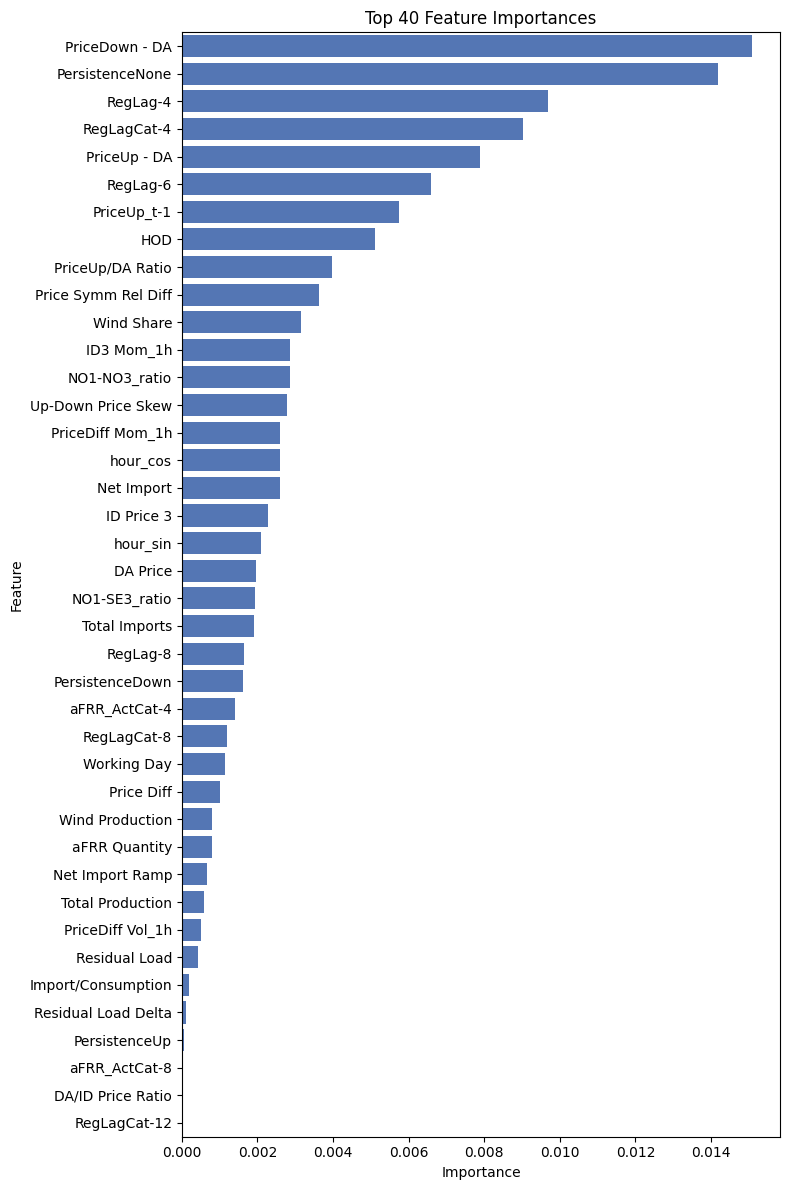

In [31]:
# 16. LightGBM-only HPO on subset (verify only GBM models)
lgbm_hpo_subset_cfg = base_common(area='NO1')
lgbm_hpo_subset_cfg.update(dict(
    output_dir=str(MODELS_DIR / 'lgbm_only_subset_hpo'),
    time_limit=900,
    presets='best_quality',
    model_preset='lgbm_only',
    hpo_trials=4,
    hpo_searcher='random',
    hpo_scheduler='local',
    data_start='2025-03-04',
))
metrics = run_training('LGBM ONLY HPO(4) SUBSET CHECK', **lgbm_hpo_subset_cfg)
# Show trained models
pred = TabularPredictor.load(lgbm_hpo_subset_cfg['output_dir'])
print('Models:', pred.model_names())

In [32]:
# 17. Inspect features after persistency-interactions disabled run
# Load predictor from cell #15 output_dir and list any Persistency interaction features
from autogluon.tabular import TabularPredictor
p = TabularPredictor.load(xgb_no_inter_subset_cfg['output_dir'])
feat_names = []
try:
    feat_names = list(p.feature_metadata.get_features())
except Exception:
    try:
        feat_names = list(p._learner.feature_metadata_in.get_features())
    except Exception:
        try:
            feat_names = list(p._learner.features)
        except Exception:
            feat_names = []
print('Total features:', len(feat_names))
bad = [f for f in feat_names if (' x Persistency' in f) or ('Persistency x ' in f) or (' x PersistencyDown' in f) or ('PersistencyDown x ' in f)]
print('Persistency-interaction features found:', bad)

Total features: 60
Persistency-interaction features found: []
